<a href="https://colab.research.google.com/github/Aroxy22/COVID-19-PREDICTION-/blob/main/Covid_19_prediction_graph_with_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
path="/content/drive/MyDrive/Datasets/owid-covid-data.csv"
df=pd.read_csv(path)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376621,ZWE,Africa,Zimbabwe,2024-01-31,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376622,ZWE,Africa,Zimbabwe,2024-02-01,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376623,ZWE,Africa,Zimbabwe,2024-02-02,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
376624,ZWE,Africa,Zimbabwe,2024-02-03,266265.0,0.0,4.429,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [60]:
import pandas as pd

# Assuming df is already defined
# List of row names you want to include
desired_rows = ['India']  # Replace with the actual names of your rows

# Filter the DataFrame to include only the desired rows
df = df[df['location'].isin(desired_rows)]






In [62]:
df.columns

Index(['location', 'total_cases'], dtype='object')

In [41]:
df=df[["location","total_cases"]]

In [67]:
df=df.reset_index()
df["index"]=df.index
df

,index,location,total_cases
0,0,India,2.0
1,1,India,2.0
2,2,India,2.0
3,3,India,2.0
4,4,India,2.0
...,...,...,...
1459,1459,India,45025076.0
1460,1460,India,45025076.0
1461,1461,India,45025076.0
1462,1462,India,45025076.0


In [12]:
df.head()

,location,total_cases
0,India,NaN
1,India,NaN
2,India,NaN
3,India,NaN
4,India,NaN


In [66]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 27 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     1464 non-null   object 
 1   total_cases  1464 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.3+ KB


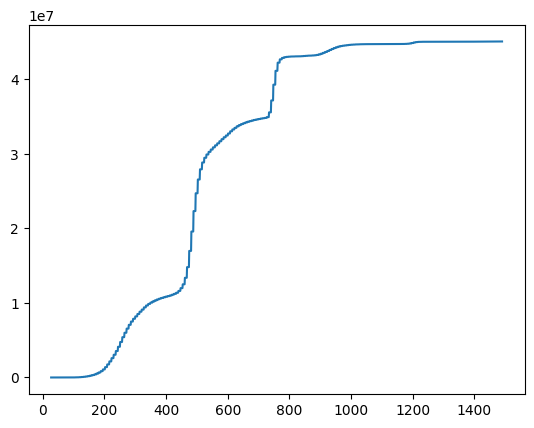

In [63]:
import matplotlib.pyplot as plt
plt.plot(df["total_cases"])
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
from sklearn.linear_model import LinearRegression
import numpy as np
df=df.dropna()
X=np.array(df["index"]).reshape(-1,1)
y=np.array(df["total_cases"]).reshape(-1,1)

In [69]:
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(X)

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.9661852602018374

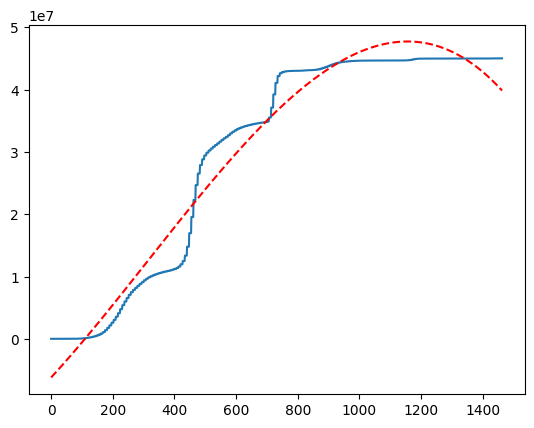

In [72]:
plt.plot(df["total_cases"])
plt.plot(lin_reg.predict(X),"r--")
plt.show()

In [86]:
lin_reg.predict(poly.fit_transform([[1861]]))

array([[344620.60650437]])